# Results Summary

### Distribution of Features/Columns:
- **Even or Normal Distribution**: The 'WhiteElo' and 'BlackElo' features had a relatively normal distribution, indicating a balanced distribution of player ratings.
- **Not Even or Normal Distribution**: The 'TotalMoves' and 'White_count_all' and 'Black_count_all' features had a skewed distribution.

### Handling Missing Values:
- **Method Used**: Missing values in numerical features were filled with the mean, and categorical features were filled with the mode.
- **Reasoning**: This method was chosen to preserve the mean/median of the data and avoid losing too much information by dropping rows/columns.

### Encoding Categorical Data:
- **Method Used**: One-hot encoding was used for the categorical features 'Event', 'ECO', and 'Termination' to represent them as binary vectors, while 'Result' was label encoded.
- **Reasoning**: One-hot encoding was chosen to capture the categorical information without assuming any ordinal relationship between categories, and label encoding was used for the target feature.

### Handling Outliers:
- **Method Used**: Outliers were removed using the IQR (Interquartile Range) method.
- **Reasoning**: This method was chosen to remove extreme values that could skew the model without drastically reducing the dataset size, but it seemed like there were some remaining outliers. I'm not sure of the reasoning since the IQR method removes values within a range, but it could be due to the distribution of the data.

### Normalizing/Standardizing Data:
- **Method Used**: Data was normalized using Min-Max scaling to a range of [0, 1].
- **Reasoning**: Min-Max scaling was chosen to scale all features to the same range, which can be beneficial for certain algorithms that require features to be on a similar scale.

### Model Performance:
- **Models Used**: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVR), Neural Network (MLP)
- **Performance**:
  - Logistic Regression:
    - Accuracy: 0.9813
    - Precision: 0.9803
    - Recall: 0.9813
    - F1-score: 0.9806
  - Decision Tree:
    - Accuracy: 0.9893
    - Precision: 0.9892
    - Recall: 0.9893
    - F1-score: 0.9892
  - Random Forest:
    - Accuracy: 0.9893
    - Precision: 0.9892
    - Recall: 0.9893
    - F1-score: 0.9889
  - Neural Network:
    - Accuracy: 0.9748
    - Precision: 0.9748
    - Recall: 0.9748
    - F1-score: 0.9748
- **Best Performing Model**: The best performing model was the Random Forest, with identical scores to the Decision Tree model except a slightly higher F1-score.


### Bias and Variance:
- **Bias (Underfitting)**: None of the models exhibited high bias.
- **Variance (Overfitting)**: None of the models exhibited high variance.


## LINKS
https://www.kaggle.com/datasets/shkarupylomaxim/chess-games-dataset-lichess-2017-may \
https://github.com/brandon-head/data-analysis-repo

## IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# import data
df = pd.read_csv("games_metadata_profile_2024_01.csv")
df.head()

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,...,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024.01.01,00:00:08,EyalSa,1550,-6.0,False,...,1410838.0,2700.0,NaN,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024.01.01,00:00:18,Frogman33,1082,9.0,False,...,2091417.0,4924.0,NaN,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024.01.01,00:00:34,Tomi_Viper,1593,-5.0,False,...,1424148.0,4085.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024.01.01,00:01:26,pony14,2289,-5.0,False,...,1195075.0,1772.0,NaN,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024.01.01,00:02:20,Niccosan,1205,6.0,False,...,332692.0,576.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0


In [3]:
df.tail()

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,...,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
130917,130918,Rated Blitz tournament https://lichess.org/tou...,-,https://lichess.org/gzfKh8TN,2024.01.31,23:53:59,LeonSav,1796,0.0,False,...,590026.0,1368.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... e5 {...,116,C57,"Italian Game: Two Knights Defense, Ulvestad Va...",300+0,Normal,0-1
130918,130919,Rated Blitz game,-,https://lichess.org/kwRAOauH,2024.01.31,23:55:08,SimbaC1,1962,-5.0,False,...,30391.0,196.0,NaN,1. e4 { [%eval 0.2] [%clk 0:03:00] } 1... c6 {...,84,B13,Caro-Kann Defense: Exchange Variation,180+0,Normal,0-1
130919,130920,Rated Rapid game,-,https://lichess.org/RuBrhCyl,2024.01.31,23:56:06,sawbstanley,1400,6.0,False,...,3686910.0,5473.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... c6 {...,75,B10,Caro-Kann Defense,600+0,Normal,1-0
130920,130921,Rated Rapid game,-,https://lichess.org/5at7GQ8j,2024.01.31,23:56:57,tkslvcoachken,1680,6.0,False,...,NaN,NaN,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... e5 {...,107,C50,Italian Game: Paris Defense,600+0,Normal,1-0
130921,130922,Rated Blitz game,-,https://lichess.org/9bvFTWuw,2024.01.31,23:59:30,Martskin,1553,-6.0,False,...,211158.0,1308.0,NaN,1. e3 { [%eval 0.07] [%clk 0:03:00] } 1... d5 ...,62,A00,Van't Kruijs Opening,180+0,Normal,0-1


In [4]:
# dropping unnecessary columns, cleaning "Event" column
dropped_cols = ["GameID", "Round", "Site", "Date", "Time",
"White", "White_is_deleted", "White_tosViolation", "White_profile_flag", "White_createdAt", "White_playTime_total", "White_title",
"Black", "Black_is_deleted", "Black_tosViolation", "Black_profile_flag", "Black_createdAt", "Black_playTime_total", "Black_title",
"Moves", "Opening", "TimeControl"]
clean_df = df.drop(columns = dropped_cols)
clean_df["Event"] = clean_df["Event"].str.replace(r'\s+https?://[^\s]+', '', regex=True)

clean_df

,Event,WhiteElo,WhiteRatingDiff,White_count_all,BlackElo,BlackRatingDiff,Black_count_all,TotalMoves,ECO,Termination,Result
0,Rated Blitz game,1550,-6.0,8428.0,1492,7.0,2700.0,54,D06,Time forfeit,0-1
1,Rated Bullet game,1082,9.0,3160.0,1155,-7.0,4924.0,63,D00,Time forfeit,1-0
2,Rated Blitz game,1593,-5.0,792.0,1641,5.0,4085.0,52,B10,Time forfeit,0-1
3,Rated Rapid game,2289,-5.0,2352.0,2307,5.0,1772.0,128,D78,Normal,0-1
4,Rated Rapid game,1205,6.0,1684.0,1214,-6.0,576.0,65,B01,Normal,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130917,Rated Blitz tournament,1796,0.0,12682.0,2299,1.0,1368.0,116,C57,Normal,0-1
130918,Rated Blitz game,1962,-5.0,10738.0,1879,192.0,196.0,84,B13,Normal,0-1
130919,Rated Rapid game,1400,6.0,1302.0,1415,-6.0,5473.0,75,B10,Normal,1-0
130920,Rated Rapid game,1680,6.0,1842.0,1653,-5.0,NaN,107,C50,Normal,1-0


# Handling Missing Values

In [5]:
print(clean_df.isna().sum())

Event                 0
WhiteElo              0
WhiteRatingDiff     995
White_count_all    2592
BlackElo              0
BlackRatingDiff     995
Black_count_all    2527
TotalMoves            0
ECO                   0
Termination           0
Result                0
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer

replace_with_mean = ["WhiteRatingDiff", "White_count_all", "BlackRatingDiff", "Black_count_all"]

imputer_mean = SimpleImputer(strategy='mean')

for col in replace_with_mean:
    clean_df[col] = imputer_mean.fit_transform(clean_df[col].values.reshape(-1, 1))

    clean_df[col].isna().sum()

clean_df

,Event,WhiteElo,WhiteRatingDiff,White_count_all,BlackElo,BlackRatingDiff,Black_count_all,TotalMoves,ECO,Termination,Result
0,Rated Blitz game,1550,-6.0,8428.0,1492,7.0,2700.000000,54,D06,Time forfeit,0-1
1,Rated Bullet game,1082,9.0,3160.0,1155,-7.0,4924.000000,63,D00,Time forfeit,1-0
2,Rated Blitz game,1593,-5.0,792.0,1641,5.0,4085.000000,52,B10,Time forfeit,0-1
3,Rated Rapid game,2289,-5.0,2352.0,2307,5.0,1772.000000,128,D78,Normal,0-1
4,Rated Rapid game,1205,6.0,1684.0,1214,-6.0,576.000000,65,B01,Normal,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130917,Rated Blitz tournament,1796,0.0,12682.0,2299,1.0,1368.000000,116,C57,Normal,0-1
130918,Rated Blitz game,1962,-5.0,10738.0,1879,192.0,196.000000,84,B13,Normal,0-1
130919,Rated Rapid game,1400,6.0,1302.0,1415,-6.0,5473.000000,75,B10,Normal,1-0
130920,Rated Rapid game,1680,6.0,1842.0,1653,-5.0,8906.431271,107,C50,Normal,1-0


In [7]:
# final check for more missing values
print(clean_df.isna().sum())

Event              0
WhiteElo           0
WhiteRatingDiff    0
White_count_all    0
BlackElo           0
BlackRatingDiff    0
Black_count_all    0
TotalMoves         0
ECO                0
Termination        0
Result             0
dtype: int64


In [8]:
# checking unique values in categorical columns to make sure there's no repetition
categoric_cols = ["Event", "Termination", "Result"]
for col in categoric_cols:
    unique_values = clean_df[col].unique()
    for val in unique_values:
        print(f"{col}: {val}")

clean_df

Event: Rated Blitz game
Event: Rated Bullet game
Event: Rated Rapid game
Event: Rated Bullet tournament
Event: Rated Blitz tournament
Event: Rated UltraBullet tournament
Event: Rated Rapid tournament
Event: Rated Classical game
Event: Rated UltraBullet game
Event: Rated Correspondence game
Event: Classical swiss
Event: Blitz swiss
Event: Rated Classical tournament
Event: Bullet swiss
Event: Rapid swiss
Termination: Time forfeit
Termination: Normal
Termination: Rules infraction
Termination: Abandoned
Result: 0-1
Result: 1-0
Result: 1/2-1/2
Result: *


,Event,WhiteElo,WhiteRatingDiff,White_count_all,BlackElo,BlackRatingDiff,Black_count_all,TotalMoves,ECO,Termination,Result
0,Rated Blitz game,1550,-6.0,8428.0,1492,7.0,2700.000000,54,D06,Time forfeit,0-1
1,Rated Bullet game,1082,9.0,3160.0,1155,-7.0,4924.000000,63,D00,Time forfeit,1-0
2,Rated Blitz game,1593,-5.0,792.0,1641,5.0,4085.000000,52,B10,Time forfeit,0-1
3,Rated Rapid game,2289,-5.0,2352.0,2307,5.0,1772.000000,128,D78,Normal,0-1
4,Rated Rapid game,1205,6.0,1684.0,1214,-6.0,576.000000,65,B01,Normal,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130917,Rated Blitz tournament,1796,0.0,12682.0,2299,1.0,1368.000000,116,C57,Normal,0-1
130918,Rated Blitz game,1962,-5.0,10738.0,1879,192.0,196.000000,84,B13,Normal,0-1
130919,Rated Rapid game,1400,6.0,1302.0,1415,-6.0,5473.000000,75,B10,Normal,1-0
130920,Rated Rapid game,1680,6.0,1842.0,1653,-5.0,8906.431271,107,C50,Normal,1-0


# Outlier Removal

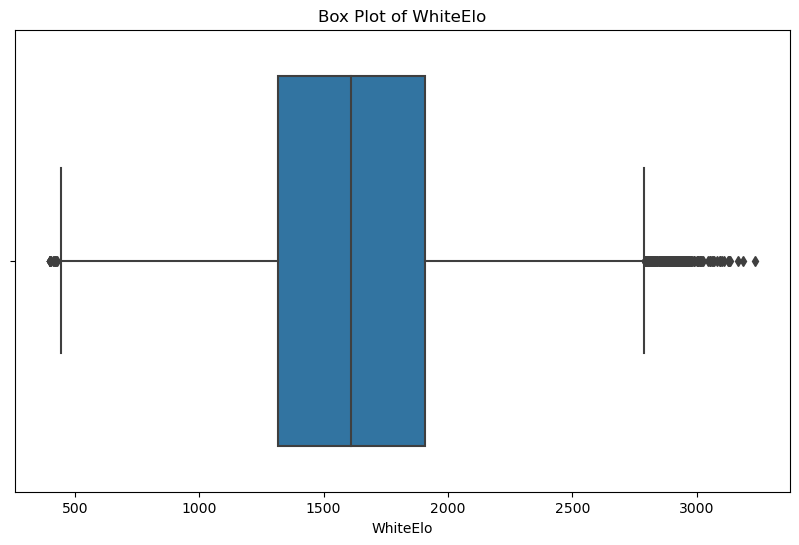

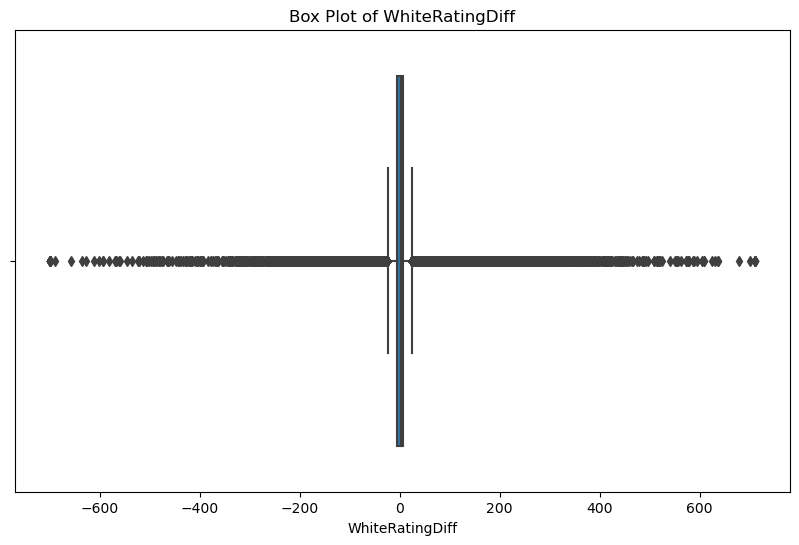

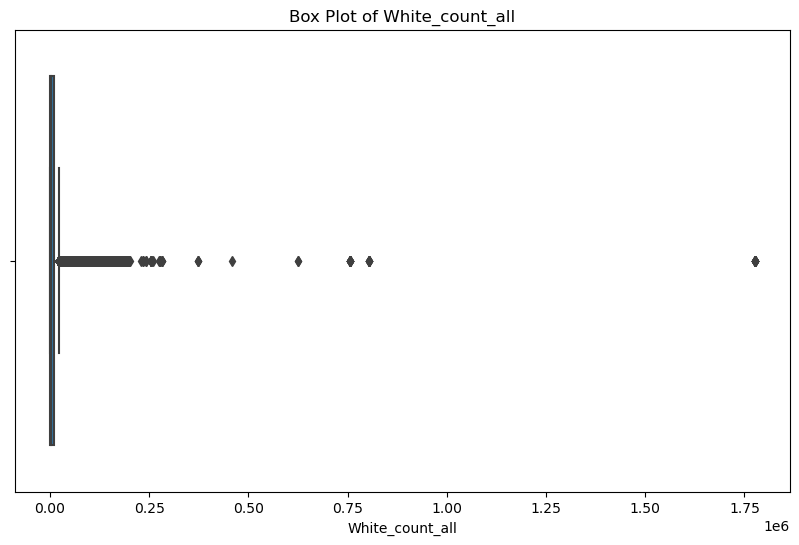

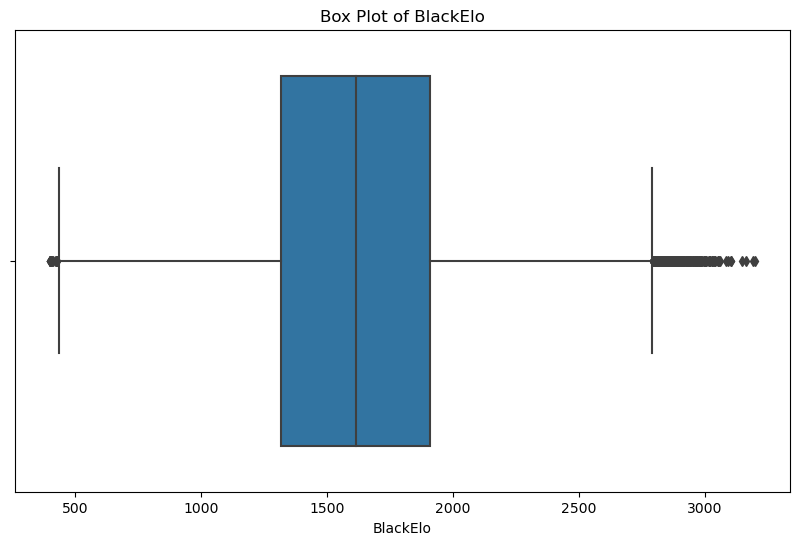

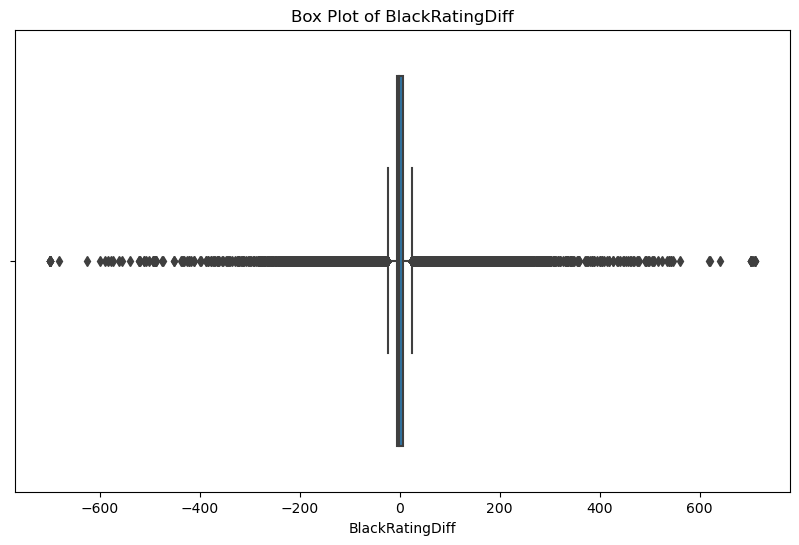

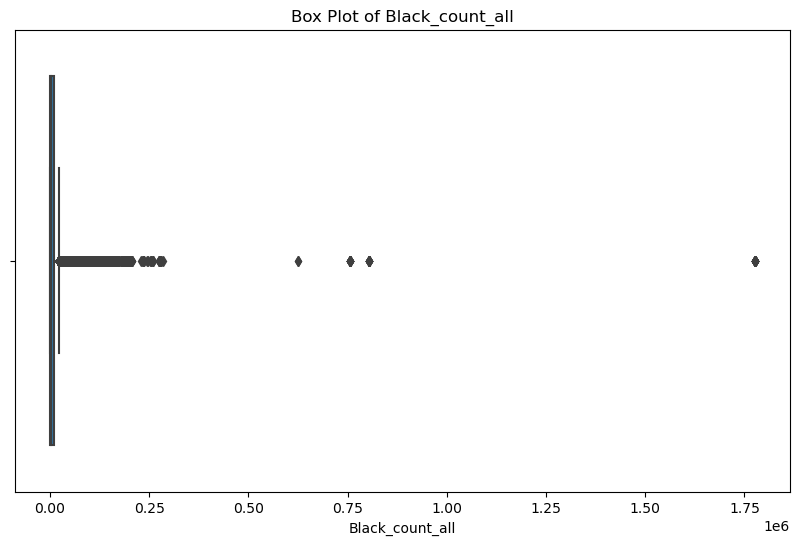

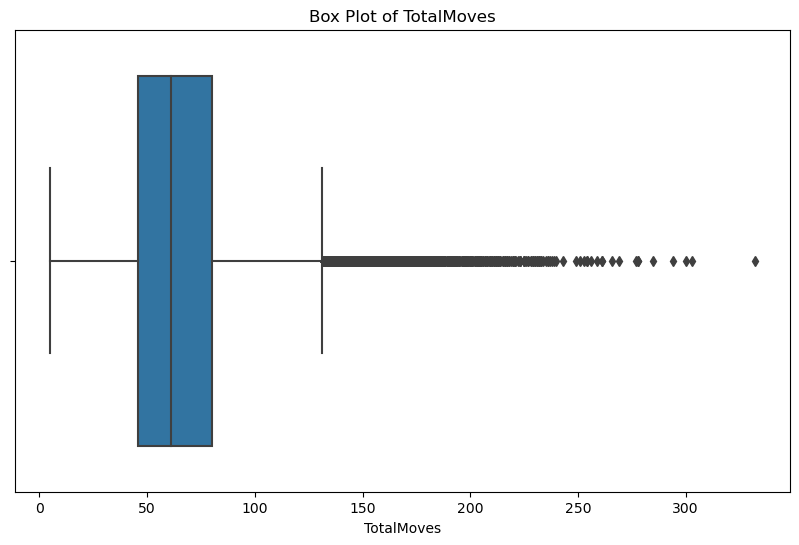

In [9]:
import seaborn as sns

numerical_cols = ["WhiteElo", "WhiteRatingDiff", "White_count_all", "BlackElo", "BlackRatingDiff", "Black_count_all", "TotalMoves"]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=clean_df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [10]:
outlier_cols = ["TotalMoves", "Black_count_all", "White_count_all", "BlackElo", "WhiteElo"]

for col in outlier_cols:
    Q1 = np.percentile(clean_df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(clean_df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    maxThreshold = Q3+1.5*IQR
    minThreshold = Q1-1.5*IQR

    clean_df = clean_df[clean_df[col] < maxThreshold]
    clean_df = clean_df[clean_df[col] > minThreshold]

clean_df

,Event,WhiteElo,WhiteRatingDiff,White_count_all,BlackElo,BlackRatingDiff,Black_count_all,TotalMoves,ECO,Termination,Result
0,Rated Blitz game,1550,-6.0,8428.0,1492,7.0,2700.000000,54,D06,Time forfeit,0-1
1,Rated Bullet game,1082,9.0,3160.0,1155,-7.0,4924.000000,63,D00,Time forfeit,1-0
2,Rated Blitz game,1593,-5.0,792.0,1641,5.0,4085.000000,52,B10,Time forfeit,0-1
3,Rated Rapid game,2289,-5.0,2352.0,2307,5.0,1772.000000,128,D78,Normal,0-1
4,Rated Rapid game,1205,6.0,1684.0,1214,-6.0,576.000000,65,B01,Normal,1-0
...,...,...,...,...,...,...,...,...,...,...,...
130916,Rated Bullet game,1391,-5.0,19873.0,1420,6.0,5133.000000,68,C00,Time forfeit,0-1
130917,Rated Blitz tournament,1796,0.0,12682.0,2299,1.0,1368.000000,116,C57,Normal,0-1
130918,Rated Blitz game,1962,-5.0,10738.0,1879,192.0,196.000000,84,B13,Normal,0-1
130919,Rated Rapid game,1400,6.0,1302.0,1415,-6.0,5473.000000,75,B10,Normal,1-0


# Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode categorical features
one_hot_encoded_columns = ["Event", "ECO", "Termination"]
label_encoded_column = "Result"

for col in clean_df:
    print(col)

for col in one_hot_encoded_columns:

    #creating instance of one-hot-encoder
    #sparse = False puts it in format where it can be dataframe later
    encoder = OneHotEncoder(sparse=False)

    #perform one-hot encoding on the column 
    encoded_one_hot_data = encoder.fit_transform(clean_df[[col]])

    one_hot_df = pd.DataFrame(encoded_one_hot_data, columns=encoder.categories_)

    clean_df = pd.concat([clean_df, one_hot_df], axis=1, levels=1).drop(columns = col)

lab = LabelEncoder()

clean_df[label_encoded_column] = lab.fit_transform(clean_df[label_encoded_column])

print(clean_df.dtypes)
clean_df

Event
WhiteElo
WhiteRatingDiff
White_count_all
BlackElo
BlackRatingDiff
Black_count_all
TotalMoves
ECO
Termination
Result
WhiteElo               float64
WhiteRatingDiff        float64
White_count_all        float64
BlackElo               float64
BlackRatingDiff        float64
                        ...   
(Abandoned,)           float64
(Normal,)              float64
(Rules infraction,)    float64
(Time forfeit,)        float64
(nan,)                 float64
Length: 480, dtype: object


,WhiteElo,WhiteRatingDiff,White_count_all,BlackElo,BlackRatingDiff,Black_count_all,TotalMoves,Result,"(Blitz swiss,)","(Bullet swiss,)",...,"(E95,)","(E97,)","(E98,)","(E99,)","(nan,)","(Abandoned,)","(Normal,)","(Rules infraction,)","(Time forfeit,)","(nan,)"
0,1550.0,-6.0,8428.0,1492.0,7.0,2700.0,54.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1082.0,9.0,3160.0,1155.0,-7.0,4924.0,63.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1593.0,-5.0,792.0,1641.0,5.0,4085.0,52.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2289.0,-5.0,2352.0,2307.0,5.0,1772.0,128.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1205.0,6.0,1684.0,1214.0,-6.0,576.0,65.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
129685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
129691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
129693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [12]:
# encoding added na values?? drop them
print(clean_df.isna().sum())
clean_df = clean_df.dropna()
print(clean_df.isna().sum())

WhiteElo               27671
WhiteRatingDiff        27671
White_count_all        27671
BlackElo               27671
BlackRatingDiff        27671
                       ...  
(Abandoned,)             947
(Normal,)                947
(Rules infraction,)      947
(Time forfeit,)          947
(nan,)                   947
Length: 480, dtype: int64
WhiteElo               0
WhiteRatingDiff        0
White_count_all        0
BlackElo               0
BlackRatingDiff        0
                      ..
(Abandoned,)           0
(Normal,)              0
(Rules infraction,)    0
(Time forfeit,)        0
(nan,)                 0
Length: 480, dtype: int64


# Normalization

In [13]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalize_cols = ["WhiteElo", "BlackElo", "White_count_all", "Black_count_all", "TotalMoves"]

clean_df[normalize_cols] = scaler.fit_transform(clean_df[normalize_cols])

clean_df.head()

/var/folders/sn/b34t4r4j58g67t4179rmcqs80000gn/T/ipykernel_72197/3986256544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[normalize_cols] = scaler.fit_transform(clean_df[normalize_cols])


,WhiteElo,WhiteRatingDiff,White_count_all,BlackElo,BlackRatingDiff,Black_count_all,TotalMoves,Result,"(Blitz swiss,)","(Bullet swiss,)",...,"(E95,)","(E97,)","(E98,)","(E99,)","(nan,)","(Abandoned,)","(Normal,)","(Rules infraction,)","(Time forfeit,)","(nan,)"
0,0.504898,-6.0,0.417509,0.476402,7.0,0.123085,0.392,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.296527,9.0,0.156510,0.326358,-7.0,0.224507,0.464,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.524043,-5.0,0.039189,0.542743,5.0,0.186246,0.376,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.833927,-5.0,0.116478,0.839270,5.0,0.080764,0.984,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.351291,6.0,0.083383,0.352627,-6.0,0.026222,0.480,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Training and evaluation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split training and testing
X = clean_df.drop(columns=["Result"])
y = clean_df["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='sag'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(solver='sgd',learning_rate_init=0.0001, max_iter=2000)
}

eval_metrics = {}

for name, model in models.items():
    print(f"Training {model}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Store the metrics in the dictionary
    eval_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    print(f"{model} trained")

# Print the evaluation metrics dictionary
for model_name, metrics in eval_metrics.items():
    print(f"{model_name} metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Training LogisticRegression(max_iter=1000, solver='sag')


/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag') trained
Training DecisionTreeClassifier()


/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier() trained
Training RandomForestClassifier()


/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier() trained
Training MLPClassifier(learning_rate_init=0.0001, max_iter=2000, solver='sgd')


/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


MLPClassifier(learning_rate_init=0.0001, max_iter=2000, solver='sgd') trained
Logistic Regression metrics:
Accuracy: 0.9813326740017307
Precision: 0.9802518659311973
Recall: 0.9813326740017307
F1-score: 0.9805810621841643

Decision Tree metrics:
Accuracy: 0.9893064655705279
Precision: 0.9891900746275665
Recall: 0.9893064655705279
F1-score: 0.9892392899051874

Random Forest metrics:
Accuracy: 0.9893064655705279
Precision: 0.989197091998692
Recall: 0.9893064655705279
F1-score: 0.9888631373964036

Neural Network metrics:
Accuracy: 0.9747805662010137
Precision: 0.9748366656770574
Recall: 0.9747805662010137
F1-score: 0.974807418326607



/Users/brandonhead/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
